# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

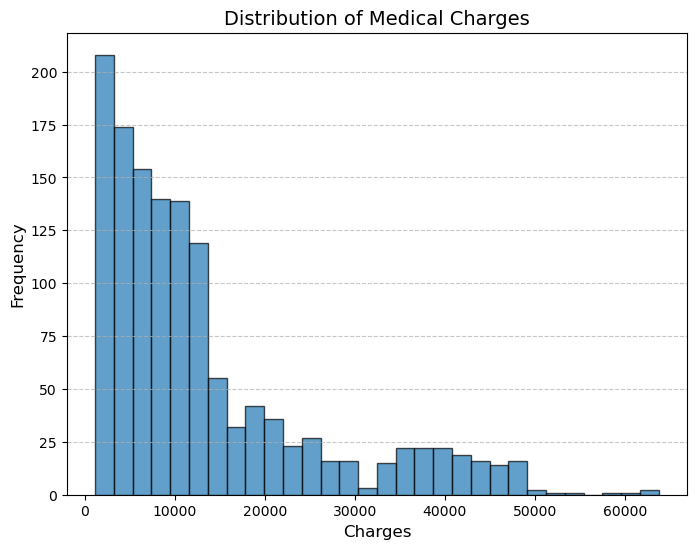

In [5]:
# Plot histogram of charges
plt.figure(figsize=(8,6))
plt.hist(medical['charges'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Medical Charges", fontsize=14)
plt.xlabel("Charges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Calculate mean and standard deviation
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

print(f"Mean: {mean_charges:,.2f}")
print(f"Standard Deviation: {std_charges:,.2f}")

Mean: 13,270.42
Standard Deviation: 12,110.01


The histogram is highly right-skewed. Most individuals incur relatively modest charges, but a small number have extremely high charges.
The mean, therefore, can be misleading because it is disproportionately pulled upward by outliers.
The standard deviation is also problematic: it assumes data are spread symmetrically around the mean, which is not the case here. Large outliers inflate the variability measure.

Better statistics for this data would include the median and the interquartile range (IQR - to measure spread).

In [8]:
# Calculate median 
median_charges = medical['charges'].median()

# Calculate IQR f
Q1 = medical['charges'].quantile(0.25)
Q3 = medical['charges'].quantile(0.75)
IQR = Q3 - Q1

print(f"Median: {median_charges:,.2f}")
print(f"Q1 (25th percentile): {Q1:,.2f}")
print(f"Q3 (75th percentile): {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")

Median: 9,382.03
Q1 (25th percentile): 4,740.29
Q3 (75th percentile): 16,639.91
IQR: 11,899.63


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
Assuming the charges values are a random sample of individual patient charges, the data is:
1 - Indepent: each sampled charge is (approximately) independent of the others.
2- Has Finite variance: charges have finite variance even if they’re skewed.
3 - Has a Large sample size: n=1338, so by the Central Limit Theorem the sampling distribution of the mean is approximately normal even though the raw data are right-skewed.

Together, these justify inference on the population mean using a t-based method.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [10]:
# One-sided
from scipy import stats

mu0 = 12000
xbar = medical['charges'].mean()
s = medical['charges'].std(ddof=1)
n = medical['charges'].shape[0]
df = n - 1

# t statistic
t_stat = (xbar - mu0) / (s / np.sqrt(n))

# one-sided p-value for H1: mu < mu0
p_value = stats.t.cdf(t_stat, df=df)

print(f"n = {n}, x̄ = {xbar:,.2f}, s = {s:,.2f}, t = {t_stat:.3f}, p(one-sided) = {p_value:.6f}")

n = 1338, x̄ = 13,270.42, s = 12,110.01, t = 3.837, p(one-sided) = 0.999935


In [14]:
# Two-sided

# Sample statistics
xbar2 = medical['charges'].mean()
s2 = medical['charges'].std(ddof=1)
n2 = len(medical)
df2 = n - 1

# Confidence level
alpha = 0.05

# Critical t-value for two-sided 95% CI
t_crit = stats.t.ppf(1 - alpha/2, df)

# two-sided p-value
p_value2 = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

# Margin of error
moe = t_crit * (s / np.sqrt(n))

# Confidence interval
ci_lower = xbar - moe
ci_upper = xbar + moe

print(f"T critical value: {t_crit:,.2f}")
print(f"Sample mean: {xbar2:,.2f}")
print(f"Two-sided p-value = {p_value2:.6f}")
print(f"95% CI: ({ci_lower:,.2f}, {ci_upper:,.2f})")


T critical value: 1.96
Sample mean: 13,270.42
Two-sided p-value = 0.000130
95% CI: (12,620.95, 13,919.89)


Conclusion for 1-sided test - Because the mean is above 12,000, the t statistic is positive and the one-sided p-value for H1:μ<12000is very large. We fail to reject H0 and find no evidence that the true average charge has fallen below $12,000.

The result is consistent for a 2-sided test.  Because the entire confidence interval is well above 12,000, we can conclude (at the 5% significance level) that the true mean charge is very unlikely to be below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
Define the hypotheses
We want to test whether people with insurance are charged differently than those without insurance.

Let group 0 = without insurance, group 1 = with insurance.

Null hypothesis H0: μ0 = μ1  (the mean charges are the same for both groups)
Alternative hypothesis H1: μ0 != μ1 (the mean charges differ between insured and uninsured patients)
This is a two sided test.

ssumption
By using the pooled standard deviation, we are making the assumption of equal population variances (homoscedasticity).

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [16]:
# Split into insured (1) and uninsured (0) groups
group0 = medical.loc[medical['insuranceclaim'] == 0, 'charges']  # uninsured
group1 = medical.loc[medical['insuranceclaim'] == 1, 'charges']  # insured

# --- MANUAL CALCULATION (Pooled variance t-test) ---

n0, n1 = len(group0), len(group1)
mean0, mean1 = group0.mean(), group1.mean()
s0, s1 = group0.std(ddof=1), group1.std(ddof=1)

print(f"mean group 0 (uninsured) = {mean0:.2f}")
print(f"mean group 1 (insured)  = {mean1:.2f}")

# Pooled standard deviation
sp = np.sqrt(((n0 - 1)*s0**2 + (n1 - 1)*s1**2) / (n0 + n1 - 2))

# t-statistic
t_stat_manual = (mean0 - mean1) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

# Two-sided p-value
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_stat_manual), df))

print("Manual calculation:")
print(f"t-statistic = {t_stat_manual:.3f}")
print(f"p-value = {p_value_manual:.6f}")

# --- SCIPY BUILT-IN FUNCTION (independent samples t-test) ---
t_stat_scipy, p_value_scipy = stats.ttest_ind(group0, group1, equal_var=True)

print("\nSciPy ttest_ind (equal_var=True):")
print(f"t-statistic = {t_stat_scipy:.3f}")
print(f"p-value = {p_value_scipy:.6f}")

mean group 0 (uninsured) = 8821.42
mean group 1 (insured)  = 16423.93
Manual calculation:
t-statistic = -11.893
p-value = 0.000000

SciPy ttest_ind (equal_var=True):
t-statistic = -11.893
p-value = 0.000000


The negative t-stat reflects that uninsured patients have a lower mean charge than insured patients.

The p-value is effectively zero, so we reject the null hypothesis H0: μ0 = μ1  (the mean charges are the same for both groups)

Conclusion: There is strong statistical evidence that patients with insurance are charged a different amount (specifically, more) than those without insurance.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
There isn’t a dedicated scipy.stats function for a one-sample or two-sample z-test, because in practice the population variance is rarely known. The t-test is preferred and generalizes to this situation, reducing to a z-test as the sample size grows large. If a true z-test is required, it can be implemented manually or via statsmodels.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test